#### Q6 : Write a Python Program to implement Polynomial Regression on a dataset of your own choice.

#### Ans :

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Generate synthetic dataset

In [5]:
np.random.seed(42)  # for reproducibility

# Generate 100 data points between -3 and 3
X = np.linspace(-3, 3, 100).reshape(-1, 1)


#### Split into training and testing sets

In [7]:

y_true = 0.5 * X**3 - 1.0 * X**2 + 2.0 * X + 3
noise = np.random.normal(0, 3, size=X.shape)
y = (y_true + noise).ravel()  # flatten to 1D


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# print(X_train)

#### Create polynomial features (degree can be changed)

In [13]:

degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


####  Fit Linear Regression on polynomial features

In [15]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


#### Evaluation

In [18]:

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [19]:
print(f"Polynomial Degree: {degree}")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")


Polynomial Degree: 3
Model Coefficients: [ 2.90617996 -0.91186825  0.34730759]
Model Intercept: 2.39467387182847
Train MSE: 7.344
Test MSE: 5.420
Train R²: 0.913
Test R²: 0.943


#### Visualization (for 1D polynomial regression)

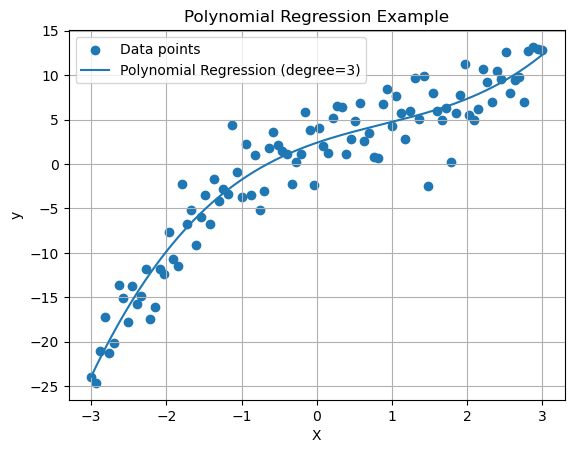

In [21]:
# Sort values for smooth curve
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, y, label="Data points")
plt.plot(X_plot, y_plot, label=f"Polynomial Regression (degree={degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Example")
plt.legend()
plt.grid(True)
plt.show()